# Масштабирование признаков

Импорт библиотек и чтение данных, а также вывод колонок датасета.

In [250]:
!pip install mlxtend
!pip install mlxtend.feature_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mlxtend.feature_selection (from versions: none)
ERROR: No matching distribution found for mlxtend.feature_selection


In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.datasets import load_digits
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from enum import Enum

hdata = pd.read_csv('Game Sales.csv', sep=",")

In [252]:
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('Name', dtype('O')),
 ('Year_of_Release', dtype('int64')),
 ('Genre', dtype('O')),
 ('Publisher', dtype('O')),
 ('NA_Sales', dtype('float64')),
 ('EU_Sales', dtype('float64')),
 ('JP_Sales', dtype('float64')),
 ('Other_Sales', dtype('float64')),
 ('Global_Sales', dtype('float64')),
 ('Critic_Score', dtype('int64')),
 ('Critic_Count', dtype('int64')),
 ('User_Score', dtype('float64')),
 ('User_Count', dtype('int64')),
 ('Developer', dtype('O')),
 ('Rating', dtype('O'))]

Для кодирования категориальных признаков будет использован Label Encoding.

In [253]:
cols_filter = ['Name', 'Genre', 'Publisher', 'Developer', 'Rating']
data = hdata[cols_filter]
le = LabelEncoder()
cat_enc_le_1 = le.fit_transform(data['Genre'])
cat_enc_le_2 = le.fit_transform(data['Genre'])
cat_enc_le_3 = le.fit_transform(data['Publisher'])
cat_enc_le_4 = le.fit_transform(data['Developer'])
cat_enc_le_5 = le.fit_transform(data['Rating'])
data['Name'] = cat_enc_le_1
data['Genre'] = cat_enc_le_2
data['Publisher'] = cat_enc_le_3
data['Developer'] = cat_enc_le_4
data['Rating'] = cat_enc_le_5
hdata[cols_filter] = data
hdata.describe()

<ipython-input-253-f2c6da78c69f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Name'] = cat_enc_le_1
<ipython-input-253-f2c6da78c69f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre'] = cat_enc_le_2
<ipython-input-253-f2c6da78c69f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.00000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000
mean,5.096171,2007.482303,5.096171,136.956919,0.390920,0.234517,0.063867,0.08200,0.771487,70.258486,28.842472,7.184378,174.392370,655.294169,3.543081
std,3.818211,4.236401,3.818211,84.636311,0.963231,0.684214,0.286461,0.26862,1.954780,13.861082,19.194572,1.439806,584.872155,380.311707,2.126177
min,0.000000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.010000,13.000000,3.000000,0.500000,4.000000,0.000000,0.000000
25%,1.000000,2004.000000,1.000000,65.000000,0.060000,0.020000,0.000000,0.01000,0.110000,62.000000,14.000000,6.500000,11.000000,332.000000,1.000000
50%,6.000000,2007.000000,6.000000,150.000000,0.150000,0.060000,0.000000,0.02000,0.290000,72.000000,24.000000,7.500000,27.000000,630.000000,4.000000
75%,8.000000,2011.000000,8.000000,216.000000,0.390000,0.210000,0.010000,0.07000,0.750000,80.000000,39.000000,8.200000,89.000000,999.000000,6.000000
max,11.000000,2016.000000,11.000000,271.000000,41.360000,28.960000,6.500000,10.57000,82.530000,98.000000,113.000000,9.600000,10665.000000,1304.000000,7.000000


DataFrame не содержащий целевой признак.

In [254]:
X_ALL = hdata.drop('User_Score', axis=1)

Разделение выборки на обучающую и тестовую.

In [255]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

X_train, X_test, y_train, y_test = train_test_split(X_ALL, hdata['User_Score'], test_size=0.2, random_state=1)
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((5515, 14), (1379, 14))

## Масштабирование данных на основе Z-оценки

In [256]:
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled.describe()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Developer,Rating
count,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03,6.894000e+03
mean,4.122673e-18,-1.174756e-14,4.122673e-18,-1.195575e-16,8.245347e-18,-8.245347e-18,-2.576671e-17,-4.122673e-17,-2.061337e-17,1.071895e-16,7.420812e-17,1.649069e-17,1.381096e-16,-9.069881e-17
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-1.334798e+00,-5.307319e+00,-1.334798e+00,-1.618299e+00,-4.058715e-01,-3.427788e-01,-2.229683e-01,-3.052874e-01,-3.895795e-01,-4.131181e+00,-1.346440e+00,-2.913538e-01,-1.723170e+00,-1.666530e+00
25%,-1.072876e+00,-8.220552e-01,-1.072876e+00,-8.502514e-01,-3.435766e-01,-3.135460e-01,-2.229683e-01,-2.680573e-01,-3.384191e-01,-5.958470e-01,-7.733201e-01,-2.793845e-01,-8.501385e-01,-1.196168e+00
50%,2.367326e-01,-1.138557e-01,2.367326e-01,1.541186e-01,-2.501343e-01,-2.550805e-01,-2.229683e-01,-2.308273e-01,-2.463304e-01,1.256497e-01,-2.523017e-01,-2.520261e-01,-6.651387e-02,2.149173e-01
75%,7.605760e-01,8.304104e-01,7.605760e-01,9.339823e-01,-9.548145e-04,-3.583492e-02,-1.880570e-01,-4.467712e-02,-1.099273e-02,7.028471e-01,5.292259e-01,-1.460124e-01,9.038133e-01,1.155641e+00
max,1.546341e+00,2.010743e+00,1.546341e+00,1.583869e+00,4.253606e+01,4.198624e+01,2.246936e+01,3.904686e+01,4.182796e+01,2.001541e+00,4.384762e+00,1.793788e+01,1.705845e+00,1.626003e+00


Построение плотности распределения.

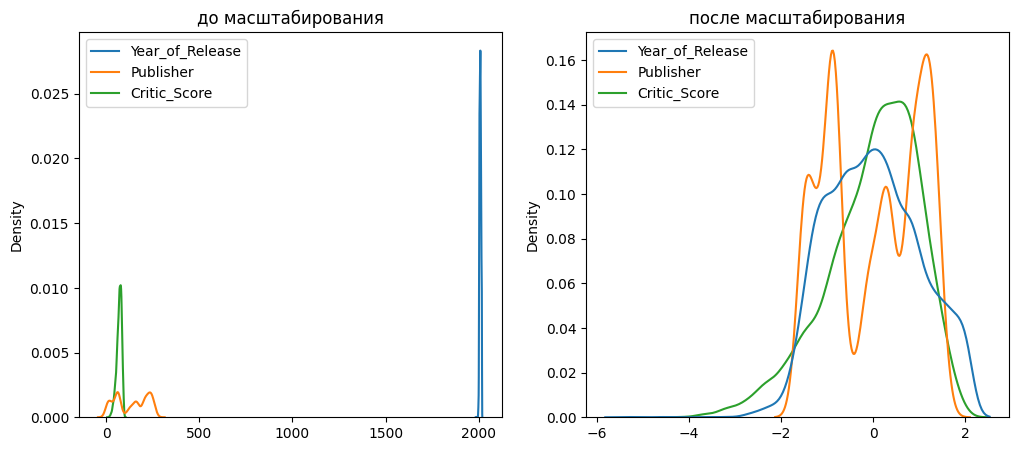

In [257]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

draw_kde(['Year_of_Release', 'Publisher', 'Critic_Score'], hdata, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

Обучение StandardScaler на обучающей выборке и масштабирование обучающей и тестовой выборки.

In [258]:
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)

data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

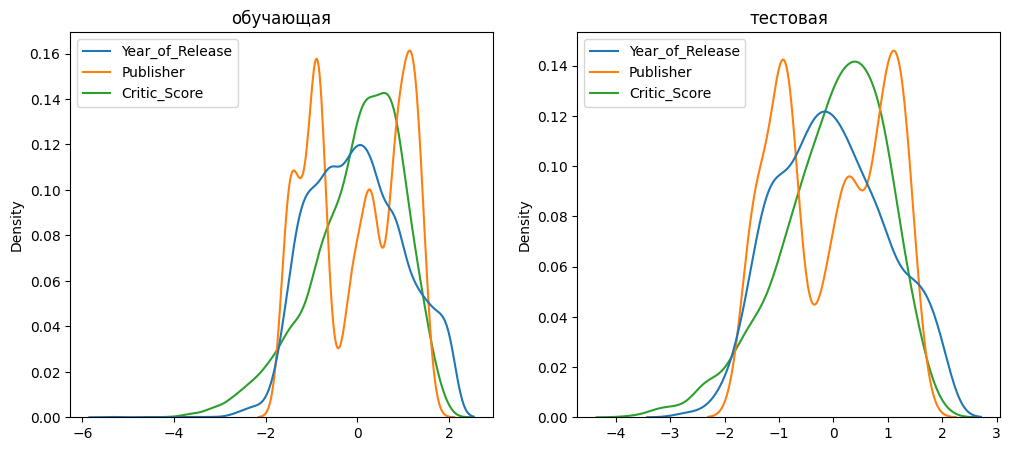

In [259]:
draw_kde(['Year_of_Release', 'Publisher', 'Critic_Score'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

## Масштабирование "Mean Normalisation"

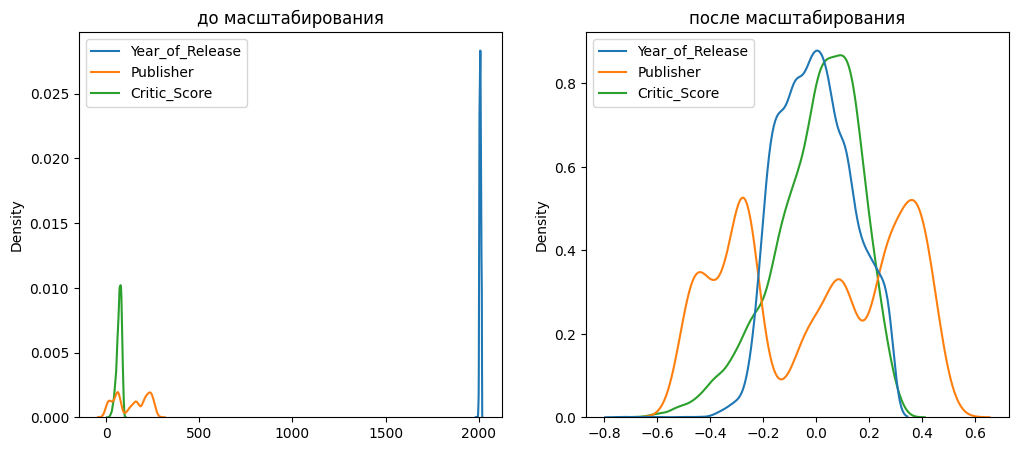

In [260]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
draw_kde(['Year_of_Release', 'Publisher', 'Critic_Score'], hdata, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

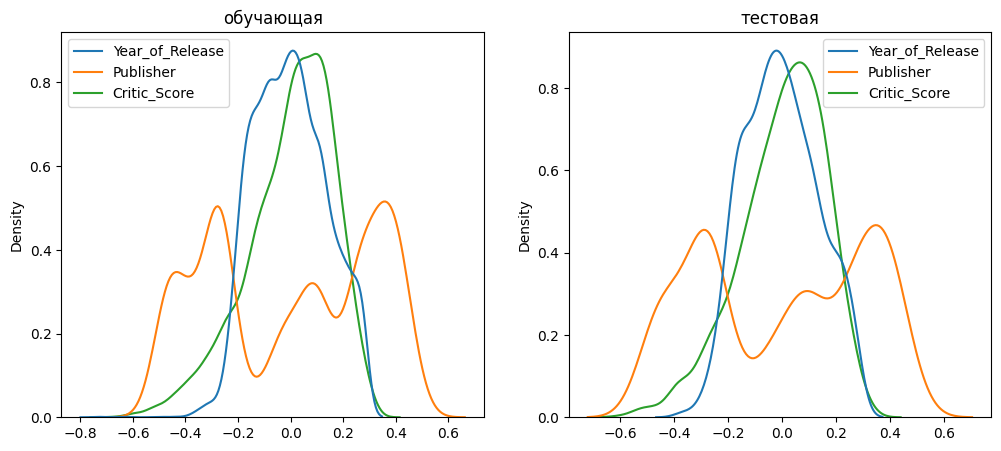

In [261]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)
draw_kde(['Year_of_Release', 'Publisher', 'Critic_Score'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

## Масштабирование по медиане

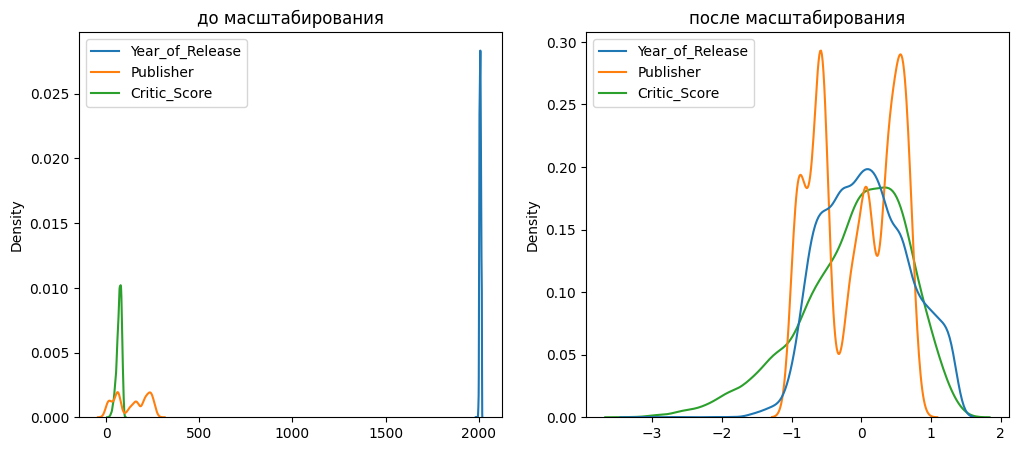

In [262]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
draw_kde(['Year_of_Release', 'Publisher', 'Critic_Score'], hdata, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

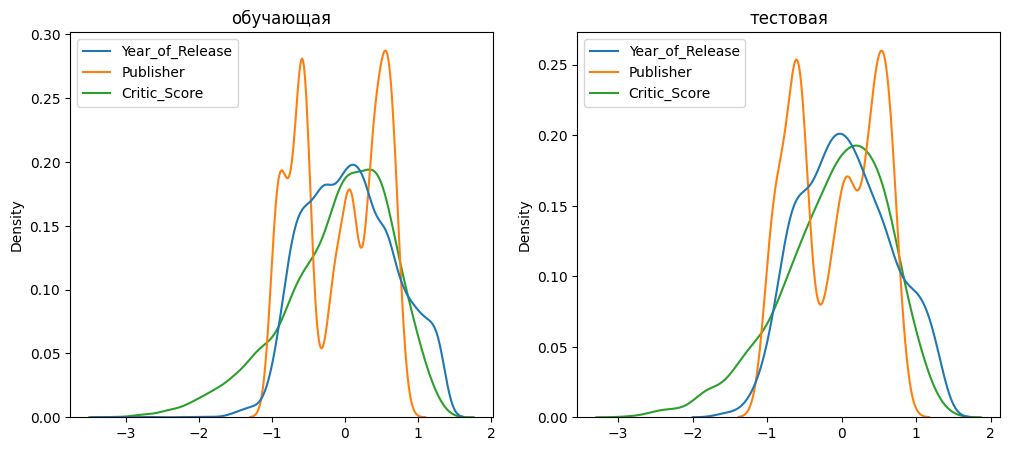

In [263]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)

data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)
draw_kde(['Year_of_Release', 'Publisher', 'Critic_Score'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

# Обработка выбросов

Обнаружение выбросов в двух параметрах.

In [264]:
x_col_list = ['Global_Sales', 'Critic_Score', 'Name']

def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(7,5))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

<ipython-input-264-97f897780a43>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


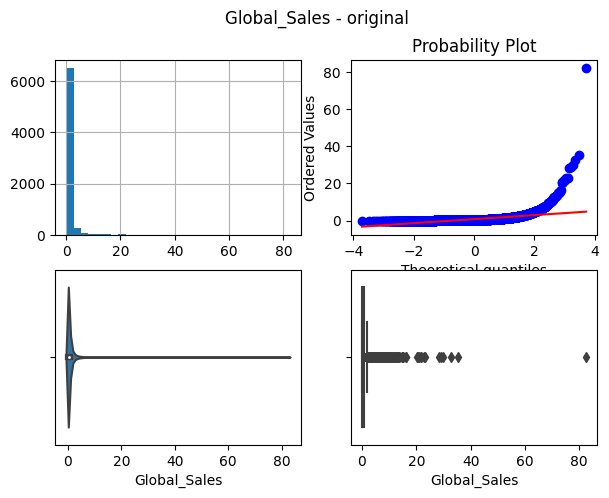

In [265]:
diagnostic_plots(hdata, 'Global_Sales', 'Global_Sales - original')

<ipython-input-264-97f897780a43>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


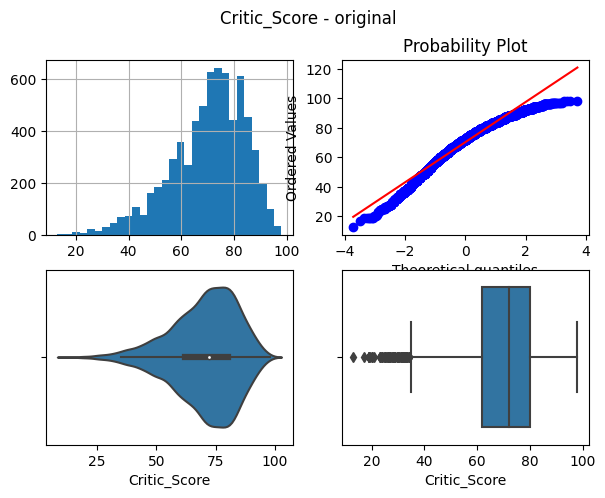

In [266]:
diagnostic_plots(hdata, 'Critic_Score', 'Critic_Score - original')

<ipython-input-264-97f897780a43>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


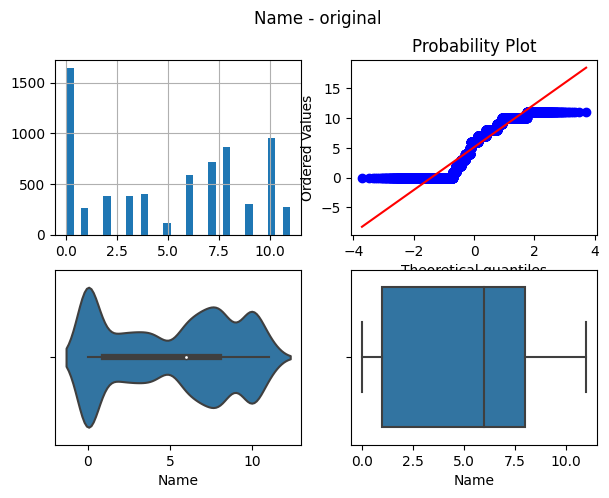

In [267]:
diagnostic_plots(hdata, 'Name', 'Name - original')

Применение правила трех сигм для удаления выбросов.

<ipython-input-264-97f897780a43>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


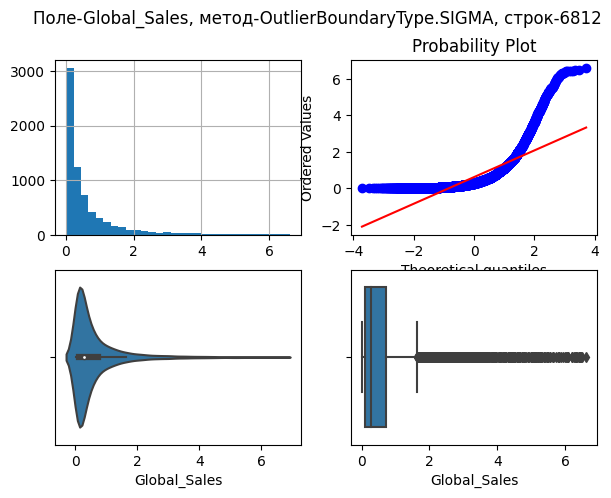

In [268]:
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())
    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)
    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)
    else:
        raise NameError('Unknown Outlier Boundary Type')
    return lower_boundary, upper_boundary  

# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(hdata, x_col_list[0], OutlierBoundaryType.SIGMA)
# Флаги для удаления выбросов
outliers_temp = np.where(hdata[x_col_list[0]] > upper_boundary, True, np.where(hdata[x_col_list[0]] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = hdata.loc[~(outliers_temp)]  
title = 'Поле-{}, метод-{}, строк-{}'.format(x_col_list[0], OutlierBoundaryType.SIGMA, data_trimmed.shape[0])
diagnostic_plots(data_trimmed, x_col_list[0], title)

Применение межквартильного размаха для замены выбросов.

<ipython-input-264-97f897780a43>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


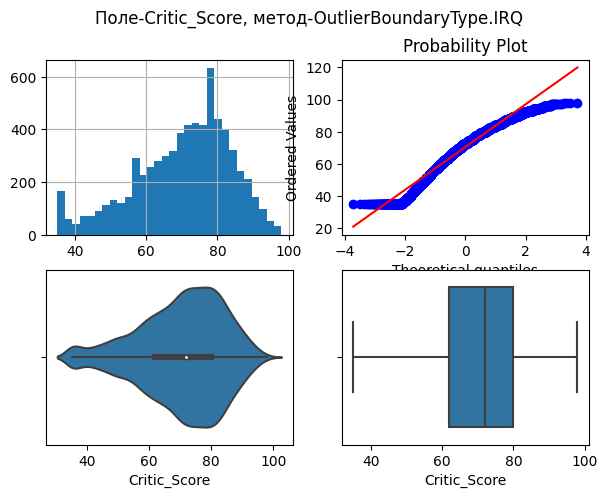

In [269]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(hdata, x_col_list[1], OutlierBoundaryType.IRQ)
# Изменение данных
hdata[x_col_list[1]] = np.where(hdata[x_col_list[1]] > upper_boundary, upper_boundary, np.where(hdata[x_col_list[1]] < lower_boundary, lower_boundary, hdata[x_col_list[1]]))
title = 'Поле-{}, метод-{}'.format(x_col_list[1], OutlierBoundaryType.IRQ)
diagnostic_plots(hdata, x_col_list[1], title)

Применение межквартильного размаха для удаления выбросов по нестандартному признаку (Названия).

<ipython-input-264-97f897780a43>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


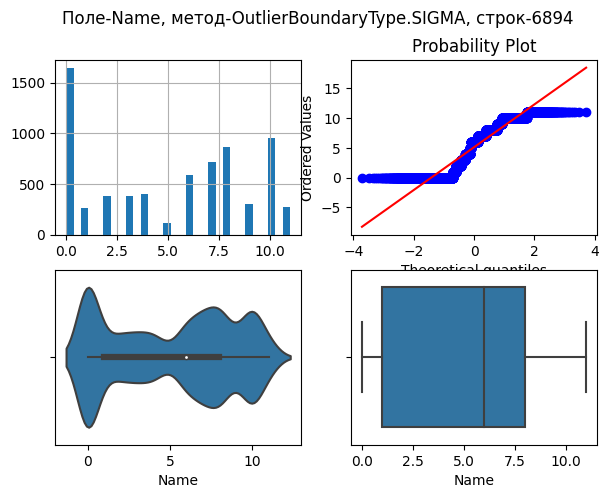

In [270]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(hdata, x_col_list[2], OutlierBoundaryType.SIGMA)
# Флаги для удаления выбросов
outliers_temp = np.where(hdata[x_col_list[2]] > upper_boundary, True, np.where(hdata[x_col_list[2]] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = hdata.loc[~(outliers_temp)]  
title = 'Поле-{}, метод-{}, строк-{}'.format(x_col_list[2], OutlierBoundaryType.SIGMA, data_trimmed.shape[0])
diagnostic_plots(data_trimmed, x_col_list[2], title)

# Отбор признаков

## Методы фильтрации (метод, основанный на корреляции)

<Axes: >

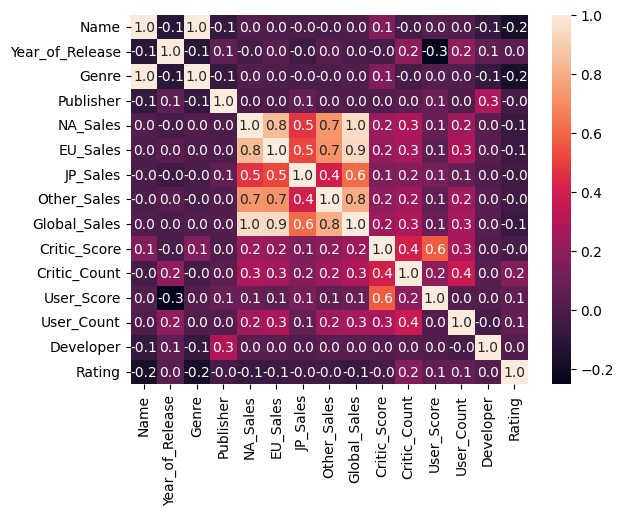

In [271]:
sns.heatmap(hdata.corr(), annot=True, fmt='.1f')

Формирование DataFrame с сильными корреляциями.

In [272]:
def make_corr_df(df):
    cr = df.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

make_corr_df(hdata)

,f1,f2,corr
0,Global_Sales,NA_Sales,0.955784
1,NA_Sales,Global_Sales,0.955784
2,Global_Sales,EU_Sales,0.939244
3,EU_Sales,Global_Sales,0.939244
4,NA_Sales,EU_Sales,0.841701
5,EU_Sales,NA_Sales,0.841701
6,Other_Sales,Global_Sales,0.804165
7,Global_Sales,Other_Sales,0.804165


Обнаружение групп коррелирующих признаков.

In [273]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

corr_groups(make_corr_df(hdata))

[['NA_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']]

## Методы обертывания (обратный алгоритм)

In [274]:
sfs1 = SFS(knn, 
           k_features=3, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X_ALL, hdata['User_Score'])
sfs1.subsets_

NameError: ignored

## Методы вложений (Линейный классификатор на основе SVM)

In [275]:
digits = load_digits()
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(digits.data, digits.target)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.02357912,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00852988,  0.        ,
         0.        ,  0.        ,  0.        ,  0.01402898,  0.        ,
        -0.01818541,  0.04068665,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.02231524, -0.09679327,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00025709,  0.        ,
         0.        , -0.07959419,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.04801838, -0.04051453, -0.0367895 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.00613066,  0.        ,
         0.        , -0.02478605,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.

Признаки со значением False исключаются.

In [276]:
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(digits.data, digits.target)
sel_e_lr2.get_support()

array([False, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True])